# Sample APP demonstration

**Details:**
    
    - python package: pyspark
    - Language model: Word2Vec (all errors)
    - Clustering algorithm: K-Means
    
**Mode:**

    - Word2Vec: training
    - K-Means: training (K optimized)

### Imports
Import libraries and write settings here.

In [6]:
from opint_framework.apps.example_app.nlp.pyspark_based.pyspark_nlp_adapter import pysparkNLPAdapter
import pandas as pd
pd.set_option('display.max_colwidth', None)

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.4
      /_/

Using Python version 3.7.3 (default, Oct  7 2019 12:56:13)
SparkSession available as 'spark'.


# Analysis/Modeling
Do work here

## Instantiate NLPAdapter object

In [7]:
# setup sample data path
#data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/sample_data_5mar20.json"""
data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data_raw.json"""

# instantiate NLPAdapter object
pipeline = pysparkNLPAdapter(path_list=[data_path], vo=None,  # data
                          tks_col="stop_token_1",  # tokenization
                          w2v_model_path="results/w2v", w2v_mode="train", w2v_save_mode="overwrite", 
                          emb_size=3, win_size=8, min_count=1, tks_vec="message_vector",  # word2vec
                          ft_col="features", kmeans_model_path="results/kmeans", kmeans_mode="train",
                          pred_mode="static", new_cluster_thresh=None, k_list=[2,4],
                          distance="cosine", opt_initSteps=10, opt_tol=0.01, opt_maxIter=10, 
                          log_path=None, n_cores=4, # K_optim
                          tr_initSteps=30, tr_tol=0.001, tr_maxIter=30,  # train_kmeans
                          clust_col="prediction", wrdcld=True, timeplot=True)

## Pre-processing 

In [8]:
pipeline.pre_process()

In [9]:
print("dataset type:", type(pipeline.context['dataset']))
print("dataset columns:", pipeline.context['dataset'].columns)
print("dataset entries:", pipeline.context['dataset'].count())

print("\nHead:\n")
pipeline.context['dataset'].toPandas().set_index(pipeline.context["id_col"]).head()

dataset type: <class 'pyspark.sql.dataframe.DataFrame'>
dataset columns: ['tr_id', 't__error_message', 'src_hostname', 'dst_hostname', 'tr_timestamp_complete']
dataset entries: 852

Head:



,t__error_message,src_hostname,dst_hostname,tr_timestamp_complete
tr_id,,,,
2020-04-02-1149__bohr3226.tier2.hep.manchester.ac.uk__xrootd.lcg.triumf.ca__472100517__6db19aef-f278-5c15-aeaf-12ccfd0e74d0,Error on XrdCl::CopyProcess::Run(): [ERROR] Server responded with an error: [3011] No such file,bohr3226.tier2.hep.manchester.ac.uk,xrootd.lcg.triumf.ca,1585828179209
2020-04-02-1200__stormfe1.pi.infn.it__srm.ihep.ac.cn__2731353342__61e56b74-74d2-11ea-a88d-fa163efc6528,TRANSFER Operation timed out,stormfe1.pi.infn.it,srm.ihep.ac.cn,1585828832948
2020-04-02-1200__cmssrm-kit.gridka.de__osg-se.sprace.org.br__2731377270__982aa234-74d8-11ea-9b13-02163e018fd7,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,cmssrm-kit.gridka.de,osg-se.sprace.org.br,1585828833677
2020-04-02-1200__xfer.cr.cnaf.infn.it__t2se01.physics.ox.ac.uk__1921870375__154c7b1a-1c49-5300-86c6-69a841533f3f,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars",xfer.cr.cnaf.infn.it,t2se01.physics.ox.ac.uk,1585828837063
2020-04-02-1200__cmssrm-kit.gridka.de__gridftp-vanderbilt.sites.opensciencegrid.org__2731313437__dcc248bc-74c8-11ea-84be-fa163ef35aba,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,cmssrm-kit.gridka.de,gridftp-vanderbilt.sites.opensciencegrid.org,1585828838820


## Run 

In [10]:
!rm -r results

In [11]:
kmeans_model = pipeline.run()


Training Word2Vec model
 ------------------------------------------------------------ 

Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8

Selecting best number of clusters
 ------------------------------------------------------------ 

With K=2

Started at: 2020-05-08 09:25:02

Within Cluster Sum of Squared Errors = 302.0639
Silhouette with cosine distance = 0.5098

Time elapsed: 0 minutes and 2 seconds.
------------------------------------------------------------
With K=4

Started at: 2020-05-08 09:25:02

Within Cluster Sum of Squared Errors = 63.936
Silhouette with cosine distance = 0.8096

Time elapsed: 0 minutes and 2 seconds.
------------------------------------------------------------

Training K-Means model for best value of K
 ------------------------------------------------------------ 

With K=4

Started at: 2020-05-08 09:25:05

Within Cluster Sum of Squared Errors = 62.7461
Silhouette with cosine distance = 0.8095

Time elapsed: 0 minutes and 1 seconds

In [7]:
print("kmeans_model type:", type(kmeans_model))
print("kmeans_model keys:", kmeans_model.keys())

kmeans_model

kmeans_model type: <class 'dict'>
kmeans_model keys: dict_keys(['model', 'wsse', 'asw'])


{'model': KMeans_fb3a7218af65,
 'wsse': 79.32025215572625,
 'asw': 0.7213682095980256}

In [8]:
kmeans_model["model"].summary.predictions.columns


['tr_id',
 't__error_message',
 'corrected_message',
 'tokens',
 'tokens_cleaned',
 'stop_token',
 'stop_token_1',
 'message_vector',
 'features',
 'prediction']

In [9]:
print("Optimal number of clusters:", kmeans_model["model"].summary.k)
print("\nRaw predictions dataset:")

kmeans_model["model"].summary.predictions.toPandas().set_index(pipeline.context["id_col"]).head()

Optimal number of clusters: 4

Raw predictions dataset:


,t__error_message,corrected_message,tokens,tokens_cleaned,stop_token,stop_token_1,message_vector,features,prediction
tr_id,,,,,,,,,
2020-04-02-1149__bohr3226.tier2.hep.manchester.ac.uk__xrootd.lcg.triumf.ca__472100517__6db19aef-f278-5c15-aeaf-12ccfd0e74d0,Error on XrdCl::CopyProcess::Run(): [ERROR] Server responded with an error: [3011] No such file,Error on xrdcl::CopyProcess::Run(): [ERROR] Server responded with an error: [3011] No such file,"[error, on, xrdcl::copyprocess::run():, [error], server, responded, with, an, error:, [3011], no, such, file]","[error, on, xrdcl::copyprocess::run(), [error], server, responded, with, an, error, [3011], no, such, file]","[error, xrdcl::copyprocess::run(), [error], server, responded, error, [3011], file]","[error, xrdcl::copyprocess::run(), [error], server, responded, error, [3011], file]","[0.5888398513197899, 1.5949683506041765, 3.6468724459409714]","[0.5888398513197899, 1.5949683506041765, 3.6468724459409714]",2
2020-04-02-1200__stormfe1.pi.infn.it__srm.ihep.ac.cn__2731353342__61e56b74-74d2-11ea-a88d-fa163efc6528,TRANSFER Operation timed out,TRANSFER Operation timed out,"[transfer, operation, timed, out]","[transfer, operation, timed, out]","[transfer, operation, timed]","[transfer, operation, timed]","[2.447409781316916, 0.5511073271433512, -0.27911412715911865]","[2.447409781316916, 0.5511073271433512, -0.27911412715911865]",3
2020-04-02-1200__cmssrm-kit.gridka.de__osg-se.sprace.org.br__2731377270__982aa234-74d8-11ea-9b13-02163e018fd7,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,"[transfer, globus_ftp_client:, the, server, responded, with, an, error, 451, transfer, was, forcefully, killed]","[transfer, globus_ftp_client, the, server, responded, with, an, error, 451, transfer, was, forcefully, killed]","[transfer, globus_ftp_client, server, responded, error, 451, transfer, forcefully, killed]","[transfer, globus_ftp_client, server, responded, error, 451, transfer, forcefully, killed]","[0.3095811271988269, 1.373739016501026, 1.5326911653909419]","[0.3095811271988269, 1.373739016501026, 1.5326911653909419]",2
2020-04-02-1200__xfer.cr.cnaf.infn.it__t2se01.physics.ox.ac.uk__1921870375__154c7b1a-1c49-5300-86c6-69a841533f3f,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars","TRANSFER error: Copy failed with mode 3rd pull, with error: Error string contains not valid UTF-8 chars","[transfer, error:, copy, failed, with, mode, 3rd, pull,, with, error:, error, string, contains, not, valid, utf-8, chars]","[transfer, error, copy, failed, with, mode, 3rd, pull, with, error, error, string, contains, not, valid, utf-8, chars]","[transfer, error, copy, failed, mode, 3rd, pull, error, error, string, contains, valid, utf-8, chars]","[transfer, error, copy, failed, mode, 3rd, pull, error, error, string, contains, valid, utf-8, chars]","[2.8554221396999697, 1.170959249138832, 0.6474742016621998]","[2.8554221396999697, 1.170959249138832, 0.6474742016621998]",3
2020-04-02-1200__cmssrm-kit.gridka.de__gridftp-vanderbilt.sites.opensciencegrid.org__2731313437__dcc248bc-74c8-11ea-84be-fa163ef35aba,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,"[transfer, globus_ftp_client:, the, server, responded, with, an, error, 451, transfer, was, forcefully, killed]","[transfer, globus_ftp_client, the, server, responded, with, an, error, 451, transfer, was, forcefully, killed]","[transfer, globus_ftp_client, server, responded, error, 451, transfer, forcefully, killed]","[transfer, globus_ftp_client, server, responded, error, 451, transfer, forcefully, killed]","[0.3095811271988269, 1.373739016501026, 1.5326911653909419]","[0.3095811271988269, 1.373739016501026, 1.53269116

# Results
Show graphs and stats here

## Post-processing

Saving time plots to: results/kmeans/K=4/plots/timeplot
Saving tokens cloud to: results/kmeans/K=4/plots/token_clouds
Saving raw prediction dataset to: results/kmeans/K=4/2020/05/08/raw
Saving msg aggregate summary to: results/kmeans/K=4/2020/05/08/aggregate/msg_aggregate_summary.json
Saving src aggregate summary to: results/kmeans/K=4/2020/05/08/aggregate/src_aggregate_summary.json
Saving dst aggregate summary to: results/kmeans/K=4/2020/05/08/aggregate/dst_aggregate_summary.json
Saving clustering summary to: results/kmeans/K=4/2020/05/08/aggregate/summary.json


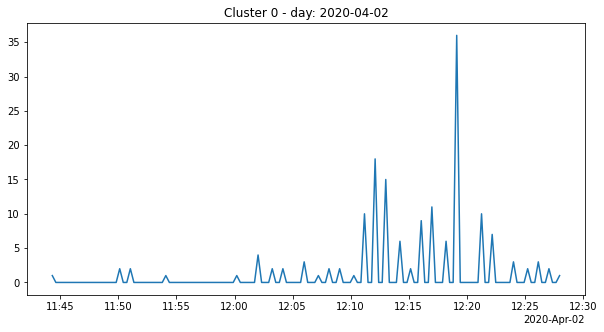

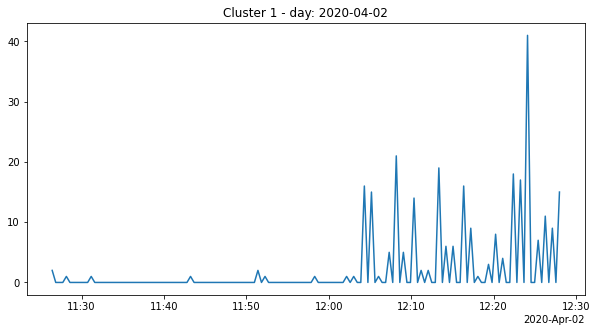

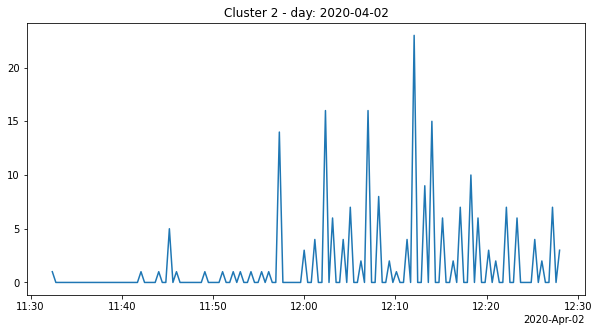

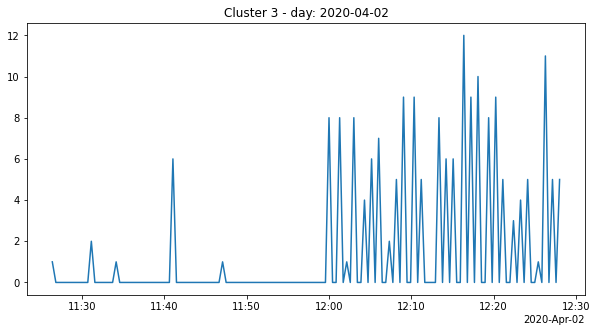

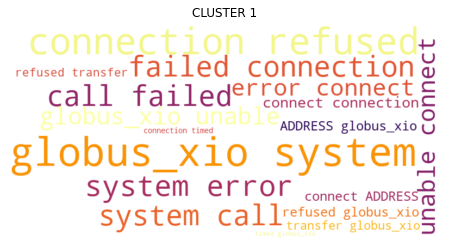

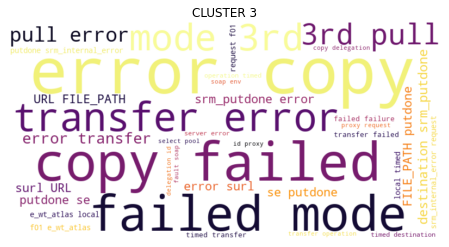

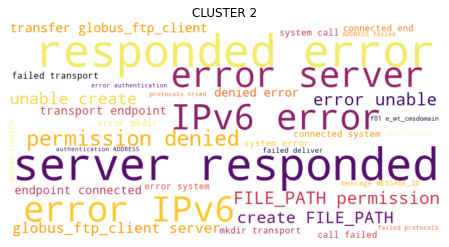

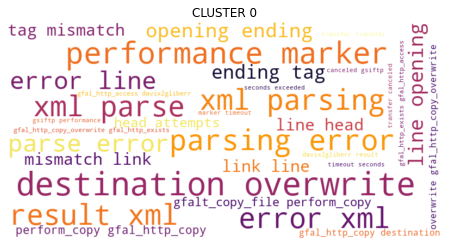

In [10]:
summary_table = pipeline.post_process(kmeans_model)

In [11]:
summary_table

clust_UUID  n_messages  \
prediction rank_pattern                                                     
1          1             4c399c88-7784-4f51-8f66-838faf98d5b8         282   
           2             0441d507-3044-4652-82bd-751953ce9e37         282   
           3             5c9b2b51-783f-4444-9b64-44f052125358         282   
           4             5cb35a4c-6a13-42e7-b927-fd2ad4378874         282   
           5             cbe67e44-18ff-4438-9ef2-83e5f9ac7de3         282   
...                                                       ...         ...   
0          36            5cdb099b-45ee-49f0-930b-42dede4a6eb3         165   
           37            d8f708fc-ba2e-4e8a-9e5c-564e04354b4d         165   
           38            fa4acfa0-82a5-4669-8db5-f0a39e5502db         165   
           39            ef8a334c-b3fa-48ee-900e-8cfb18d6b47c         165   
           40            4f8a1cbd-862e-4095-81d4-c6668e84ca93         165   

                         unique_strings  unique_patterns  \
prediction rank_pattern                                    
1          1                         18               11   
           2                         18               11   
           3                         18               11   
           4                         18               11   
           5                         18               11   
...                                 ...              ...   
0          36                        40               27   
           37                        40               27   
           38                        40               27   
           39                        40               27   
           40                        40               27   

                                                                                                                                                                                                                                                                           pattern  \
prediction rank_pattern                                                                                                                                                                                                                                                              
1          1                                                                                                           transfer globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection refused globus_xio a system call failed connection refused   
           2                                                                                                                    globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection refused globus_xio a system call failed connection refused   
           3                                                                                                       transfer globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection timed out globus_xio a system call failed connection timed out   
           4                                                                                                                                                    transfer globus_xio system error in recv connection timed out globus_xio a system call failed connection timed out   
           5             transfer globus_ftp_client the server responded with an error 500 500 command failed  globus_xio unable to connect to \$IPv6 500 globus_xio system error in connect connection timed out 500 globus_xio a system call failed connection timed out 500 end   
...                                                                                                                                                                                                                                                                            ...   
0          36                               

## All in one step 

In [1]:
%load_ext autoreload
%autoreload 2

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.4
      /_/

Using Python version 3.7.3 (default, Oct  7 2019 12:56:13)
SparkSession available as 'spark'.

NLP Adapter - PySpark_adapter: Pre Processing input data

NLP Adapter - PySpark_adapter: Executing vectorization, tokenization and clusterization

Training Word2Vec model
 ------------------------------------------------------------ 

Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8

Selecting best number of clusters
 ------------------------------------------------------------ 

With K=2
With K=4

Started at: 2020-05-09 15:57:33

Within Cluster Sum of Squared Errors = 85.9094
Silhouette with cosine distance = 0.7164

Time elapsed: 0 minutes and 3 seconds.
------------------------------------------------------------

Started at: 2020-05-09 15:57:33

Within Cluster Sum of Squared Errors = 209.8503
Silhouette with cosine dis

NameError: name 'traceback' is not defined

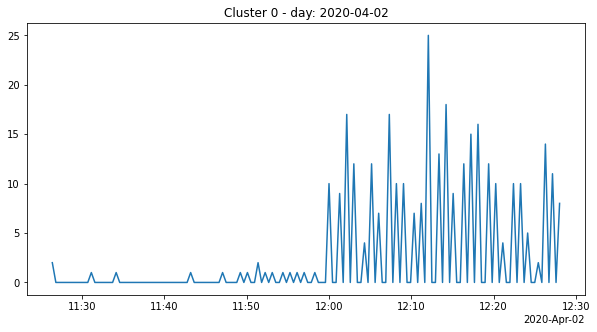

In [1]:
!rm -r results

# imports  and settings
from opint_framework.apps.example_app.nlp.pyspark_based.pyspark_nlp_adapter import pysparkNLPAdapter
import pandas as pd
pd.set_option('display.max_colwidth', None)

# setup sample data path
#data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/sample_data_5mar20.json"""
# data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data.json"""
data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data_raw.json"""

# instantiate NLPAdapter object
pipeline = pysparkNLPAdapter(path_list=[data_path], vo=None,  # data
                          tks_col="stop_token_1",  # tokenization
                          w2v_model_path="results/w2v", w2v_mode="train", w2v_save_mode="overwrite", 
                          emb_size=3, win_size=8, min_count=1, tks_vec="message_vector",  # word2vec
                          ft_col="features", kmeans_model_path="results/kmeans", kmeans_mode="train",
                          pred_mode="static", new_cluster_thresh=None, k_list=[2,4],
                          distance="cosine", opt_initSteps=10, opt_tol=0.01, opt_maxIter=10, 
                          log_path=None, n_cores=4, # K_optim
                          tr_initSteps=30, tr_tol=0.001, tr_maxIter=30,  # train_kmeans
                          clust_col="prediction", wrdcld=True, timeplot=True)

# get results
summary_table = pipeline.execute()

In [2]:
summary_table

clust_UUID  n_messages  \
prediction rank_pattern                                                     
1          1             a2327c93-0797-4012-bc81-0bf86b3e44c9         330   
           2             a2327c93-0797-4012-bc81-0bf86b3e44c9         330   
           3             a2327c93-0797-4012-bc81-0bf86b3e44c9         330   
           4             a2327c93-0797-4012-bc81-0bf86b3e44c9         330   
           5             a2327c93-0797-4012-bc81-0bf86b3e44c9         330   
...                                                       ...         ...   
2          38            37002e47-f471-4c40-86d8-9fbdc4d81d8d         168   
           39            37002e47-f471-4c40-86d8-9fbdc4d81d8d         168   
           40            37002e47-f471-4c40-86d8-9fbdc4d81d8d         168   
           41            37002e47-f471-4c40-86d8-9fbdc4d81d8d         168   
           42            37002e47-f471-4c40-86d8-9fbdc4d81d8d         168   

                         unique_strings  unique_patterns  \
prediction rank_pattern                                    
1          1                         22               15   
           2                         22               15   
           3                         22               15   
           4                         22               15   
           5                         22               15   
...                                 ...              ...   
2          38                        31               19   
           39                        31               19   
           40                        31               19   
           41                        31               19   
           42                        31               19   

                                                                                                                                                                                                                      pattern  \
prediction rank_pattern                                                                                                                                                                                                         
1          1                                                      transfer globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection refused globus_xio a system call failed connection refused   
           2                                                               globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection refused globus_xio a system call failed connection refused   
           3             transfer globus_ftp_client the server responded with an error 500 500 system error in mkdir transport endpoint is not connected 500 a system call failed transport endpoint is not connected 500 end   
           4                                                                                                                                                                                     transfer operation timed out   
           5                                                  transfer globus_xio unable to connect to \$ADDRESS globus_xio system error in connect connection timed out globus_xio a system call failed connection timed out   
...                                                                                                                                                                                                                       ...   
2          38                                                                                                                                                                                                            None   
           39                                                                                                                                                                                                            None   
           40     